In [8]:
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset 불러오기
with open("config/default.yaml", "r", encoding="utf-8") as file:
    config = yaml.safe_load(file)
    train_path = config["data"]["final_path"]

df = pd.read_csv(train_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10343 entries, 0 to 10342
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SMILES   10343 non-null  object 
 1   id       7973 non-null   float64
 2   Tg       557 non-null    float64
 3   FFV      7892 non-null   float64
 4   Tc       866 non-null    float64
 5   Density  613 non-null    float64
 6   Rg       614 non-null    float64
dtypes: float64(6), object(1)
memory usage: 565.8+ KB
None


In [16]:
def df_scattering(variable_one, variable_two, is_save=False):
    is_save = is_save

    x_variable = variable_one
    y_variable = variable_two
    plot_df = df[[x_variable, y_variable]].dropna()
    sns.set_style("whitegrid")

    plt.figure(figsize=(8,6))
    sns.regplot(x=plot_df[x_variable], y=plot_df[y_variable],
                scatter_kws={'alpha':0.5, 's':20})

    plt.title(f"Scatter Plot of {x_variable} vs. {y_variable}", fontsize=15)
    plt.xlabel(x_variable, fontsize=12)
    plt.ylabel(y_variable, fontsize=12)

    if is_save:
        plt.savefig(f"{variable_one}-{variable_two}.png")
    else:
        plt.show()

In [ ]:
target_list = config["data"]["target_column"]

for one in range(len(target_list)):
    for two in target_list[one+1:]:
        if target_list[one] != two:
            df_scattering(target_list[one], two, is_save=True)

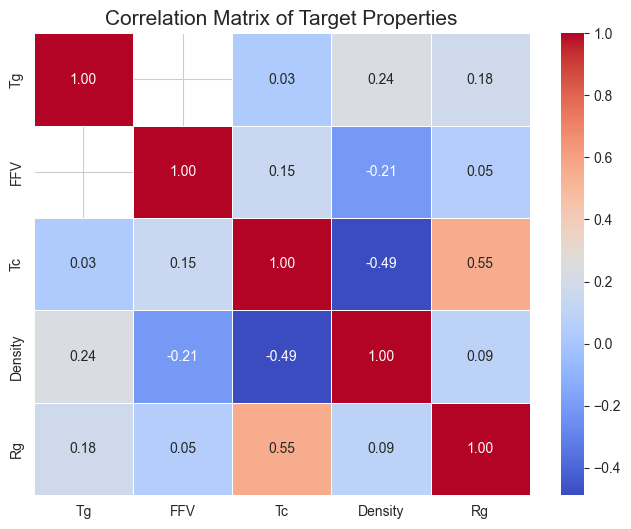

In [19]:
# 1. 분석할 target properties 컬럼만 선택
properties_df = df[["Tg", "FFV", "Tc", "Density", "Rg"]]

# 2. 상관관계 행렬 계산
correlation_matrix = properties_df.corr(method='pearson')

# 3. 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,      # 각 셀에 숫자 표기
            cmap='coolwarm', # 색상 맵 지정 (양수는 따뜻한 색, 음수는 차가운 색)
            fmt='.2f',       # 숫자를 소수점 둘째 자리까지 표기
            linewidths=.5)   # 셀 사이에 실선 추가

plt.title('Correlation Matrix of Target Properties', fontsize=15)

plt.show()

# 4. 그래프를 파일로 저장
# output_filename = 'correlation_heatmap.png'
# plt.savefig(output_filename, dpi=300, bbox_inches='tight')
# plt.close()

# print(f"상관관계 히트맵이 '{output_filename}' 파일로 저장되었습니다.")
# print("\n===== Correlation Matrix =====")
# print(correlation_matrix)

In [20]:
# 1. 분석할 target properties 컬럼만 선택
# pairplot은 NaN 값을 자동으로 제외하고 그려주므로 dropna()를 미리 할 필요는 없습니다.
properties_df = df[config["data"]["target_column"]]

# 2. 페어 플롯 생성
# diag_kind='kde' : 대각선에 밀도 그래프(kde)를 그림
# kind='reg' : 산점도에 회귀선을 추가
pair_plot = sns.pairplot(properties_df, diag_kind='kde', kind='reg',
                         plot_kws={'scatter_kws': {'alpha': 0.4, 's': 10}}) # 점 스타일 조절

# 3. 그래프를 파일로 저장
output_filename = 'pair_plot.png'
pair_plot.savefig(output_filename, dpi=300)
plt.close()

print(f"페어 플롯이 '{output_filename}' 파일로 저장되었습니다.")

페어 플롯이 'pair_plot.png' 파일로 저장되었습니다.


In [21]:
# 각 컬럼별 결측치 개수 계산
missing_counts = df.isnull().sum()

# 각 컬럼별 결측치 비율 계산
missing_percent = (missing_counts / len(df)) * 100

# 결과를 보기 좋게 데이터프레임으로 합치기
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percent
})

# 결측치가 있는 컬럼만 정렬하여 출력
print("===== 각 컬럼별 결측치 분석 결과 =====")
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))

===== 각 컬럼별 결측치 분석 결과 =====
         Missing Count  Missing Percentage (%)
Tg                9786               94.614715
Density           9730               94.073286
Rg                9729               94.063618
Tc                9477               91.627187
FFV               2451               23.697187
id                2370               22.914048


In [22]:
# 결측치 분포를 히트맵으로 시각화
plt.figure(figsize=(10, 6))

# df.isnull()은 결측치이면 True, 아니면 False인 데이터프레임을 반환합니다.
sns.heatmap(df.isnull(),
            cmap='viridis',      # 색상 맵
            cbar=False,          # 컬러바 숨기기
            yticklabels=False)   # y축 라벨 숨기기 (데이터가 많으므로)

plt.title('Missing Value Distribution Heatmap', fontsize=15)

# 그래프를 파일로 저장
output_filename = 'missing_value_heatmap.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
plt.close()

print(f"\n결측치 히트맵이 '{output_filename}' 파일로 저장되었습니다.")


결측치 히트맵이 'missing_value_heatmap.png' 파일로 저장되었습니다.
